In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set visualization style
sns.set(style="whitegrid")


In [4]:
file_path = '../data/Copy of BrentOilPrices.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [5]:
# Display data types and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [7]:
# Rename columns for easier access
data.columns = ['Date', 'Price']

# Convert 'Date' to datetime format without specifying a format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Sort the data by date
data = data.sort_values('Date')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Display the first few rows to check the conversion
print("\nFirst few rows after date conversion:")
print(data.head())


/tmp/ipykernel_3568589/4213368765.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


Missing values in the dataset:
Date     0
Price    0
dtype: int64

First few rows after date conversion:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [8]:
# Display descriptive statistics
data.describe()


,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


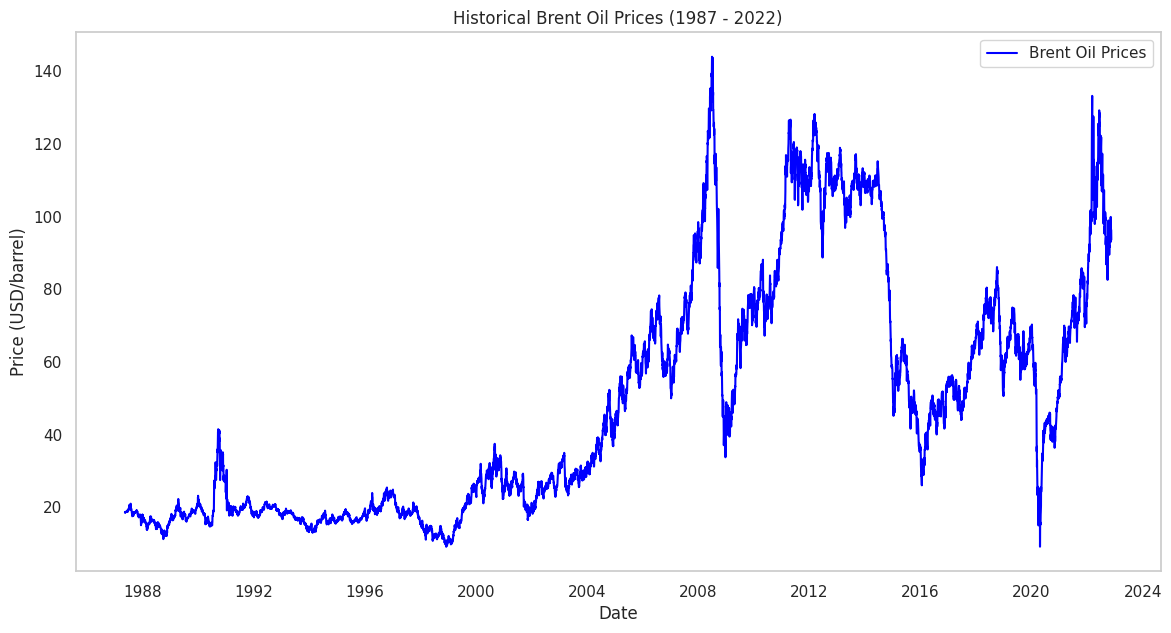

In [9]:
# Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], label='Brent Oil Prices', color='blue')
plt.title('Historical Brent Oil Prices (1987 - 2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid()
plt.show()


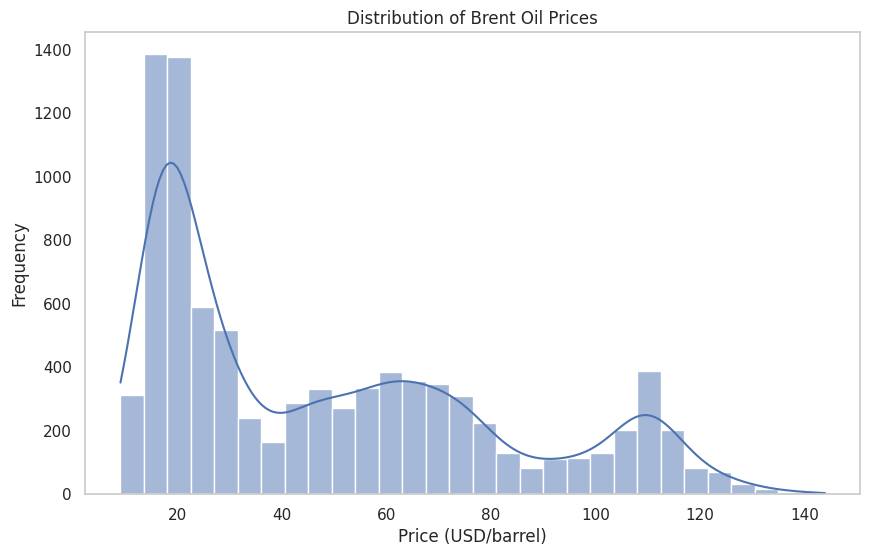

In [10]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price (USD/barrel)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


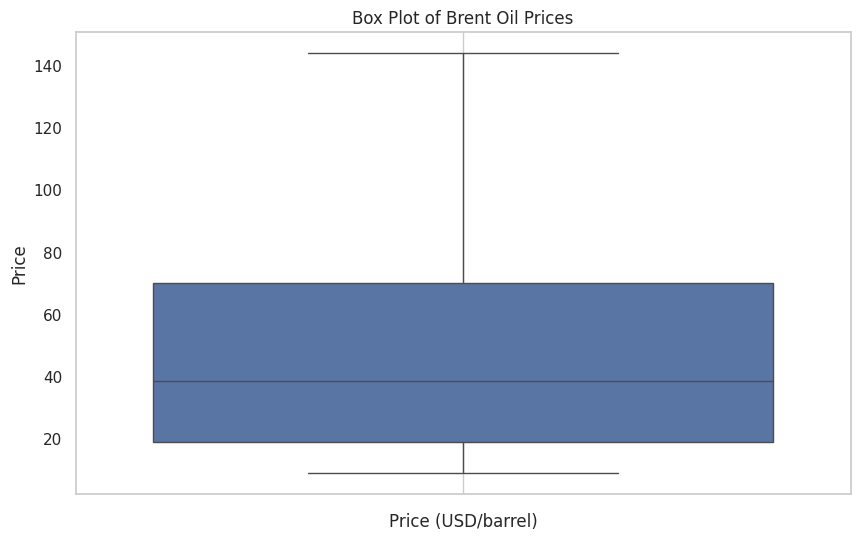

In [11]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data['Price'])
plt.title('Box Plot of Brent Oil Prices')
plt.xlabel('Price (USD/barrel)')
plt.grid()
plt.show()


In [12]:
#  Check Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print("Performing ADF test for stationarity:")
adf_test(data['Price'])


Performing ADF test for stationarity:
ADF Statistic: -1.9938560113924666
P-value: 0.2892735048934033
Critical Values:
   1%: -3.4310783342658615
   5%: -2.861861876398633
   10%: -2.566941329781918


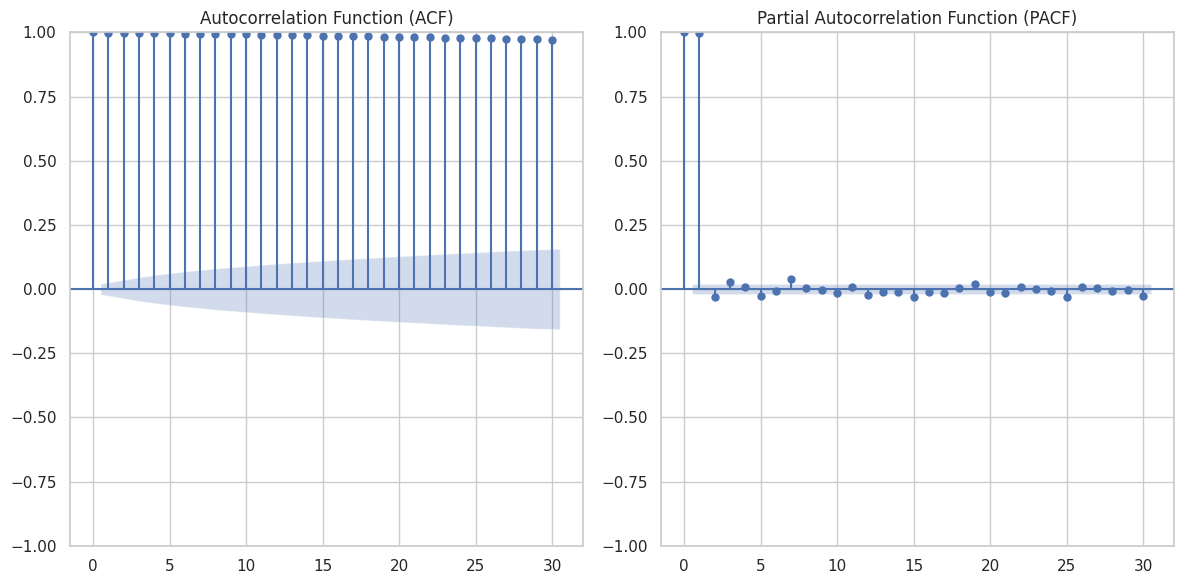

In [13]:
#  ACF and PACF Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data['Price'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(data['Price'], ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()


In [ ]:
#  Saving Cleaned Data 
data.to_csv('../data/cleaned_brent_oil_prices.csv', index=False)
